# 1. Coleta de Dados

Inicialmente a ideia é fazer uma análise do Campeonato Brasileiro - Série A, procurando uma relação entre o valor que os clubes investem em seus elencos e o quanto esse investimento dá de resultado. 
Os dados foram coletados do site Transfermarket(https://www.transfermarkt.com), que é uma plataforma que exibe detalhes financeiros de cada competição, clube e jogador do mundo. O período de análise é de 2008 até 2017, pois antes de 2008 nem todos os clubes do Brasil tinham seus dados completos no site e o campeonato de 2018 ainda não terminou para poder ser feita uma boa análise.

## Coleta de dados

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests as rq

In [2]:
campeonatos = []
for i in range(2007,2017):
    campeonatos.append(i)
campeonatos

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [3]:
urls = []
for i in range(len(campeonatos)):
    urls.append('https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id='
                +str(campeonatos[i]))
urls

['https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2007',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2008',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2009',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2010',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2011',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2012',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2013',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2014',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id

In [77]:
#Só executar quando for fazer coleta
allNames = []
allSquads = []
allAges = []
allFPs = []
allValues = []
allAvgValues = []
allRelValues = []

allPos = []
allGDs = []
allPoints = []

allLogos = []
allLinks = []

baseLink = "https://www.transfermarkt.com"
headers = {'User-Agent': 'ajgan'}

for a in range(len(urls)):
    r = rq.get(urls[a], headers=headers)
    parsed_page = BeautifulSoup(r.text,"html.parser")
    
    teams = parsed_page.find_all('tr')[11:31]
    positions = parsed_page.find_all('tr')[72:92]
    
    teamName = []
    teamSquad = []
    teamAge = []
    teamFP = []
    teamValue = []
    teamAvgValue = []
    teamRelValue = []

    teamPos = []
    teamGD = []
    teamPoints = []
    
    teamLogo = []
    teamLink = []

    for i in range(len(teams)):
        teamName.append(teams[i].find_all('td')[2].text)
        teamSquad.append(int(teams[i].find_all('td')[3].text))
        teamAge.append(float(teams[i].find_all('td')[4].text.replace(",",".")))
        teamFP.append(int(teams[i].find_all('td')[5].text))
        
        value = float((teams[i].find_all('td')[6].text.replace(" Mill. €", "0000").replace(",","").replace(" Th. €", "000")))
        teamValue.append(value)
        avgValue = float((teams[i].find_all('td')[7].text.replace(" Mill. €", "0000").replace(",","").replace(" Th. €", "000")))
        teamAvgValue.append(avgValue)
        
        teamLogo.append(teams[i].find_all('td')[0].img['src'])
        teamLink.append(baseLink + teams[i].find_all('td')[2].a['href'])
        
    for j in range(len(teamName)):
        for k in range(len(positions)):
            if (teamName[j] == positions[k].find_all('a')[1].text):
                teamPos.append(int(positions[k].find_all('td')[0].text))
                teamGD.append(positions[k].find_all('td')[4].text)
                teamPoints.append(int(positions[k].find_all('td')[5].text))
                break
    
    totalLeagueValue = 0
    for m in range(len(teams)):
        teamName[m] = teamName[m] + " - " + str(campeonatos[a]+1)
        totalLeagueValue += teamValue[m]
    
    for n in range(len(teams)):
        teamRelValue.append(teamValue[n]/totalLeagueValue)
        
        
    allNames.extend(teamName)
    allSquads.extend(teamSquad)
    allAges.extend(teamAge)
    allFPs.extend(teamFP)
    allValues.extend(teamValue)
    allAvgValues.extend(teamAvgValue)
    allRelValues.extend(teamRelValue)

    allPos.extend(teamPos)
    allGDs.extend(teamGD)
    allPoints.extend(teamPoints)
    
    allLogos.extend(teamLogo)
    allLinks.extend(teamLink)

In [78]:
#Só executar pós-coleta
columns = ['Equipe', 'Pos', 'Pts', 'SG', 'TamanhoElenco', 'IdadeElenco',
           'JogadoresEstrangeiros','Valor', 'ValorMedio', 'ValorRelativo', 'Escudo', 'Link']

brasileirao = pd.DataFrame(list(zip(allNames, allPos, allPoints, allGDs, allSquads, allAges,
                                    allFPs, allValues, allAvgValues, allRelValues, allLogos, allLinks))
                          , columns=columns)

brasileirao.to_csv("brasileirao.csv")

In [4]:
#Só executar se a coleta já tiver sido feita
brasileirao = pd.read_csv("brasileirao.csv", index_col=0)

In [5]:
brasileirao

,Equipe,Pos,Pts,SG,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,Valor,ValorMedio,ValorRelativo,Escudo,Link
0,São Paulo - 2008,1,75,30,41,24.2,1,54150000.0,1320000.0,0.298232,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/fc-sao-paulo/sta...
1,Palmeiras - 2008,4,65,10,28,23.4,1,23600000.0,843000.0,0.129977,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/se-palmeiras-sao...
2,Flamengo - 2008,5,64,20,30,23.5,1,18500000.0,617000.0,0.101889,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/flamengo-rio-de-...
3,Internacional - 2008,6,54,1,34,23.3,4,18000000.0,529000.0,0.099135,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/sc-internacional...
4,Grêmio - 2008,2,72,24,34,22.7,1,11900000.0,350000.0,0.065539,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/gremio-foot-ball...
5,Fluminense - 2008,14,45,1,35,23.2,1,8700000.0,249000.0,0.047915,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/fluminense-footb...
6,Portuguesa - 2008,19,38,-22,33,24.8,1,6150000.0,186000.0,0.033871,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/portuguesa-sao-p...
7,Santos FC - 2008,15,45,-9,29,22.4,3,6050000.0,209000.0,0.033320,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/fc-santos/starts...
8,Atlético-MG - 2008,12,48,-10,42,23.4,4,5540000.0,132000.0,0.030512,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/atletico-mineiro...
9,Cruzeiro - 2008,3,67,15,25,23.1,1,4950000.0,198000.0,0.027262,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/ec-cruzeiro-belo...


## Análise preliminar

In [6]:
brasileirao.describe()

,Pos,Pts,SG,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,Valor,ValorMedio,ValorRelativo
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.00000,2.000000e+02,2.000000e+02,200.000000
mean,10.500000,51.86000,0.010000,41.150000,23.988500,2.59000,3.539675e+07,8.462600e+05,0.050000
std,5.780751,11.38148,15.111974,9.684858,0.937289,1.97774,2.615462e+07,5.883257e+05,0.036932
min,1.000000,20.00000,-57.000000,20.000000,21.600000,0.00000,1.000000e+06,3.000000e+04,0.004876
25%,5.750000,45.00000,-9.000000,34.000000,23.300000,1.00000,1.385000e+07,3.437500e+05,0.020603
50%,10.500000,51.00000,-1.000000,41.000000,23.950000,2.00000,3.009000e+07,7.585000e+05,0.040720
75%,15.250000,59.00000,11.000000,47.250000,24.600000,4.00000,5.308250e+07,1.320000e+06,0.072632
max,20.000000,81.00000,40.000000,77.000000,26.500000,8.00000,1.158000e+08,2.520000e+06,0.298232


Alguns pontos interessantes de se destacar são:
- Em geral, os clubes brasileiros tem elencos muito grandes. Em um esporte que só jogam 11 de cada vez, ter uma média de elenco beirando os 41 é algo muito alto. Além diso, o valor máximo e mínimo assustam muito, ao percebermos que algum clube teve um elenco de 77 jogadores e outro de apenas 20.
- A média de idade dos clubes brasileiros é relativamente baixa. Talvez por existirem muitos jogadores jovens no futebol brasileiro e esses serem baratos, mas de boa qualidade.
- A média de jogadores estrangeiros ficar em 2,59. Eu esperava um número menor, pois não me aparenta ter de 2 a 3 estrangeiros em cada clube. Mas essa média passa a ser bem aceitável por conta do terceiro quartil e do valor máximo. A minha impressão errada se justifica pelo valor do primeiro quartil e também porque esses dados cobrem todo o elenco e alguns jogadores estrangeiros podem passar desapercebidos pelo grande público.
- A distância que temos entre o valor máximo investido e o valor do terceiro quartil dos dados é bem significativa. O clube que mais investiu tem praticamente o dobro do investimento do clube representante do terceiro quartil.
- Na parte do valor relativo os números tem um comportamento bem normal, menos no valor máximo, quando notamos que um clube teve um investimento que representa sozinho 30% do investimento de todos os 20 clubes juntos.

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

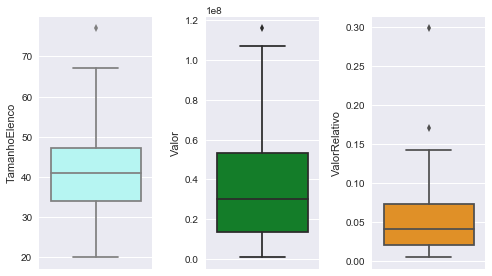

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(7,4))
sns.boxplot(y = brasileirao["TamanhoElenco"], ax = ax1, color=sns.xkcd_rgb["light cyan"])
sns.boxplot(y = brasileirao["Valor"], ax=ax2, color=sns.xkcd_rgb["emerald green"])
sns.boxplot(y = brasileirao["ValorRelativo"], ax=ax3, color=sns.xkcd_rgb["tangerine"])
fig.tight_layout()
plt.show()

De fato, tanto o clube que clube com 77 jogadores, como o clube que vale 115.8 milhões de euro e o clube que representa 30% do valor total do campeonato são todos outliers na distribuição dos dados, como nos mostra os boxplots acima.

In [9]:
clubea = 0
clubeb = 0
clubec = 0
for i in range(len(brasileirao)):
    if (brasileirao["TamanhoElenco"][i] == 77):
        clubea = i
        
    if (brasileirao["Valor"][i] >= 115000000):
        clubeb = i
    if (brasileirao["ValorRelativo"][i] >= 0.29):
        clubec = i
        
print("O clube com 77 jogadores é o "+brasileirao["Equipe"][clubea])
print("O clube mais caro é o "+brasileirao["Equipe"][clubeb])
print("O clube com maior valor relativo é o "+brasileirao["Equipe"][clubec])
print("")
print(brasileirao.T[clubea])
print("")
print(brasileirao.T[clubeb])
print("")
print(brasileirao.T[clubec])

O clube com 77 jogadores é o Avaí FC - 2011
O clube mais caro é o São Paulo - 2013
O clube com maior valor relativo é o São Paulo - 2008

Equipe                                                      Avaí FC - 2011
Pos                                                                     20
Pts                                                                     31
SG                                                                     -30
TamanhoElenco                                                           77
IdadeElenco                                                           24.3
JogadoresEstrangeiros                                                    1
Valor                                                            3.373e+07
ValorMedio                                                          438000
ValorRelativo                                                    0.0334872
Escudo                   https://tmssl.akamaized.net//images/wappen/tin...
Link                     https://www.

Um fato interessante é que o São Paulo de 2008 valia mais da metade do valor do São Paulo de 2013, mas ainda assim representa uma fatia de mais que o dobro no seu respectivo campeonato. Isso, além de provar que os valores de mercado cresceram com o tempo, também nos mostra que as outras equipes conseguiram equilibrar um pouco mais na questão financeira.
<br> Outro detalhe é o Avaí de 2011, que mesmo com um elenco de 77 jogadores foi o lanterna do campeonato, evidenciando que uma grande quantidade de jogadores não ajuda. Fato que pode até atrapalhar por evidenciar falta de planejamento.

## Visualização dos dados

Com esse dataset foi feita uma visualização usando <b>d3.js</b> para tentar analisar a relação entre o dinheiro investido pelo clube e sua posição final na tabela. A escolha de usar d3 foi por conta da versatilidade da ferramenta e de sua qualidade. <br>A visualização pode ser acessada através do arquivo <b>brasileiraov1.html</b> que está no mesmo diretório desse Notebook.
<br>Visualizações mais simples foram feitas usando Seaborn apenas para manter tudo documentado no próprio Notebook

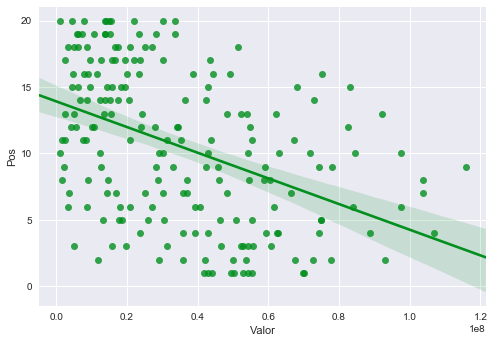

In [10]:
ax = sns.regplot(x=brasileirao["Valor"], y=brasileirao["Pos"], color=sns.xkcd_rgb["emerald green"])
plt.show(ax)

In [11]:
model = smf.ols("Pos ~ Valor",data=brasileirao)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pos   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     46.75
Date:                Thu, 14 Jun 2018   Prob (F-statistic):           9.79e-11
Time:                        12:36:20   Log-Likelihood:                -613.00
No. Observations:                 200   AIC:                             1230.
Df Residuals:                     198   BIC:                             1237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9191      0.621     22.405      0.000      12.694      15.144
Valor      -9.659e-08   1.41e-08     -6.837      0.000   -1.24e-07   -6.87e-08
==============================================================================
Omnibus:                       62.550   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.888
Skew:                          -0.098   Prob(JB):                      0.00432
Kurtosis:                       1.874   Cond. No.                     7.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir desse modelo de regressão se constata que existe uma relação entre o valor investido pelo clube e sua posição  final na tabela. Como a melhor posição possível é a de menor valor(1º lugar), a relação é inversa. A relação nos mostra que se um clube não investisse dinheiro nenhum, a regressão o colocaria em 14º(cenário impossível, mas apenas matematicamente hipotético). A regressão também nos mostra que pra cada 10 milhões de Euros investidos o clube diminui uma posição(o que na verdade significa que ele ganha uma posição, tendo em vista a relação inversa).

Apesar de percebermos que existe uma relação, ela é um pouco fraca e não nos diz tanto. Fazendo uso da interatividade do d3, podemos perceber que os valores investidos mudam muito com o decorrer dos anos e a relação individual de cada campeonato é bem mais significativa de medir, já que os valores de cada clube estão relacionados com a relaidade do mercado para o ano correspondente. <br>Para fazer uma boa análise, é melhor olhar ano a ano. Observando cada campeonato individualmente, fica bem mais clara a relação entre dinheiro e resultado(exceto no campeonato de 2013, como pode ser observado na visualização interativa).

Numa realidade em que os clubes possuem orçamento restrito e assumindo que eles não tem disponível além do que o investido, é inviável dizer que basta um clube investir mais e eles se sairão melhor. Temos que partir da premissa que o clube possui um orçamento fixo, mas precisa se dar bem, mesmo que esse valor disponível seja baixo. Diante dessa situação, resolvi analisar mais a fundo a realidade do futebol nordestino e ver quais campanhas deram certo e quais deram errado, para ver se existe algum padrão nessas campanhas. Existindo algum padrão, fica bem mais viável dizer como os clubes devem investir o seu pouco dinheiro e mesmo assim fazer uma boa campanha. Levando em conta os clubes pernambucanos temos:<br>*campanhas de sucesso foram destacadas em <b>negrito.</b>
- Santa Cruz: 1 campanha - 2016
- Ceará: 2 campanhas - <b>2010</b>, 2011
- Náutico: 4 campanhas - <b>2008</b>, 2009, <b>2012</b>, 2013
- Bahia: 5 campanhas - <b>2011</b>, <b>2012</b>, <b>2013</b>, 2014 <b>2017</b>
- Vitória: 7 campanhas - <b>2008</b>, <b>2009</b>, 2010, <b>2013</b>, 2014, <b>2016</b>, <b>2017</b>
- Sport: 7 campanhas <b>2008</b>, 2009, 2012, <b>2014</b>, <b>2015</b>, <b>2016</b>, <b>2017</b>

No total temos 26 participações de clubes nordestinos, sendo que 17 não resultaram em rebaixamento. Acredito que essa quantidade seja o suficiente para extrair algumas informações úteis.

In [12]:
clubesNE = ["Santa", "Ceará", "Náutico", "Bahia", "Vitória", "Sport"]

In [13]:
teamNamesNE = []
teamLinksNE = []
teamSquadNE = []
teamAgeNE = []
teamFPNE = []
teamPosNE = []
teamPointsNE = []

for i in range(len(brasileirao)):
    for club in clubesNE:
        if (club in brasileirao["Equipe"][i]):
            teamNamesNE.append(brasileirao["Equipe"][i])
            teamLinksNE.append(brasileirao["Link"][i])
            teamSquadNE.append(brasileirao["TamanhoElenco"][i])
            teamAgeNE.append(brasileirao["IdadeElenco"][i])
            teamFPNE.append(brasileirao["JogadoresEstrangeiros"][i])
            teamPosNE.append(brasileirao["Pos"][i])
            teamPointsNE.append(brasileirao["Pts"][i])

In [14]:
sucessList = []
for i in range(len(teamPosNE)):
    if(teamPosNE[i] > 16):
        sucessList.append(0)
    else:
        sucessList.append(1)

In [53]:
#Só executar quando for fazer coleta

headers = {'User-Agent': 'ajgan'}
teamGol = []
teamGolMax = []
teamDef = []
teamDefMax = []
teamMid = []
teamMidMax = []
teamAta = []
teamAtaMax = []

for i in range(len(teamLinksNE)):
    r = rq.get(teamLinksNE[i], headers=headers)
    parsed_page = BeautifulSoup(r.text,"html.parser")
    
    evenPlayers = parsed_page.find_all('tr', class_='even')[0:-2]
    oddPlayers = parsed_page.find_all('tr', class_='odd')[0:-3]
    myPlayers = evenPlayers + oddPlayers
    
    posList = []
    priceList = []
    for i in range(len(myPlayers)):
        posList.append(myPlayers[i].find_all('td')[0]['title'])
        value = ((myPlayers[i].find_all('td')[-1].text
                             .replace(" Mill. €", "0000").replace(",","").replace(" Th. €", "000").replace("\xa0","")))
        if (len(value) < 2):
            value = 0
        priceList.append(int(value))
     
    goleiros = []
    zagueiros = []
    meias = []
    atacantes = []
    for j in range(len(posList)):
        if(posList[j]=='Torwart'):
            goleiros.append(priceList[j])
        elif(posList[j]=='Abwehr'):
            zagueiros.append(priceList[j])
        elif(posList[j]=='Mittelfeld'):
            meias.append(priceList[j])
        else:
            atacantes.append(priceList[j])
    
    teamGol.append(float(format(np.sum(goleiros)/np.sum(priceList) , '.3f')))
    teamGolMax.append(float(format(np.max(goleiros)/np.sum(priceList) , '.3f')))
    
    teamDef.append(float(format(np.sum(zagueiros)/np.sum(priceList) , '.3f')))
    teamDefMax.append(float(format(np.max(zagueiros)/np.sum(priceList) , '.3f')))
    
    teamMid.append(float(format(np.sum(meias)/np.sum(priceList) , '.3f')))
    teamMidMax.append(float(format(np.max(meias)/np.sum(priceList) , '.3f')))
    
    teamAta.append(float(format(np.sum(atacantes)/np.sum(priceList) , '.3f')))
    teamAtaMax.append(float(format(np.max(atacantes)/np.sum(priceList) , '.3f')))

In [29]:
#regra de dissimilaridade pra calcular o quão balanceado é o investimento nos setores
def gini(arr):
    
    somai = 0
    somatot = arr[-1]
    for i in range(len(arr)-1):
        somaj = 0
        for j in range(i+1, len(arr)):
            somaj += abs(arr[i] - arr[j])
        somai += somaj
        somatot += arr[i]
    mult = (len(arr) - 1) * somatot
    
    # o '1 - result' é pra tornar a função de dissimilaridade em um função de similaridade
    return (1- (somai/mult))

In [54]:
teamEq = []
for i in range(len(brasileiraoNE)):
    teamEq.append(float(format(gini(brasileiraoNE.iloc[:,7:11].T[i].values) , '.3f')))

In [56]:
#Só executar pós-coleta

columnsNE = ['Equipe', 'Link', 'Pos', 'Pts', 'TamanhoElenco', 'IdadeElenco', 
           'JogadoresEstrangeiros', 'SetorGol','SetorDef', 'SetorMeio', 'SetorAtq', 'SimilaridadeSetores',
           'MelhorGol', 'MelhorDef', 'MelhorMeio', 'MelhorAtq', 'Sucesso']

brasileiraoNE = pd.DataFrame(list(zip(teamNamesNE, teamLinksNE, teamPosNE, teamPointsNE, teamSquadNE, 
                                      teamAgeNE, teamFPNE, teamGol, teamDef, teamMid, teamAta, teamEq,
                                      teamGolMax, teamDefMax, teamMidMax, teamAtaMax, sucessList ))
                             , columns=columnsNE)

brasileiraoNE.to_csv("brasileiraoNE.csv")

In [57]:
#Só executar se a coleta já tiver sido feita
brasileiraoNE = pd.read_csv("brasileiraoNE.csv", index_col=0)

In [58]:
brasileiraoNE

,Equipe,Link,Pos,Pts,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,SetorGol,SetorDef,SetorMeio,SetorAtq,SimilaridadeSetores,MelhorGol,MelhorDef,MelhorMeio,MelhorAtq,Sucesso
0,Náutico - 2008,https://www.transfermarkt.com/clube-nautico-ca...,16,44,29,24.3,0,0.000,0.168,0.328,0.504,0.443,0.000,0.134,0.134,0.504,1
1,Sport Recife - 2008,https://www.transfermarkt.com/sport-club-do-re...,11,52,33,25.3,0,0.000,0.938,0.031,0.031,0.062,0.000,0.938,0.031,0.031,1
2,EC Vitória - 2008,https://www.transfermarkt.com/esporte-clube-vi...,10,52,33,24.2,1,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1
3,Sport Recife - 2009,https://www.transfermarkt.com/sport-club-do-re...,20,31,30,25.0,1,0.050,0.405,0.396,0.149,0.563,0.038,0.115,0.048,0.072,0
4,Náutico - 2009,https://www.transfermarkt.com/clube-nautico-ca...,19,38,33,24.1,2,0.052,0.466,0.168,0.314,0.537,0.050,0.165,0.083,0.138,0
5,EC Vitória - 2009,https://www.transfermarkt.com/esporte-clube-vi...,13,48,38,24.1,2,0.039,0.397,0.206,0.358,0.591,0.039,0.172,0.039,0.172,1
6,EC Vitória - 2010,https://www.transfermarkt.com/esporte-clube-vi...,17,42,57,23.5,1,0.067,0.327,0.368,0.239,0.670,0.039,0.070,0.067,0.078,0
7,Ceará SC - 2010,https://www.transfermarkt.com/ceara-sporting-c...,12,47,43,25.8,0,0.051,0.271,0.408,0.271,0.643,0.031,0.063,0.118,0.071,1
8,Ceará SC - 2011,https://www.transfermarkt.com/ceara-sporting-c...,18,39,50,25.7,0,0.052,0.422,0.374,0.152,0.556,0.032,0.180,0.120,0.040,0
9,EC Bahia - 2011,https://www.transfermarkt.com/ec-bahia/startse...,14,46,43,23.4,1,0.034,0.236,0.469,0.261,0.557,0.019,0.048,0.145,0.097,1


In [59]:
brasileiraoNE.describe()

,Pos,Pts,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,SetorGol,SetorDef,SetorMeio,SetorAtq,SimilaridadeSetores,MelhorGol,MelhorDef,MelhorMeio,MelhorAtq,Sucesso
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,14.423077,44.230769,41.346154,24.384615,1.769231,0.039577,0.299192,0.355000,0.306231,0.539115,0.025846,0.116654,0.099462,0.135500,0.653846
std,3.931138,8.580479,7.812515,0.873472,1.656688,0.025221,0.167188,0.133184,0.171771,0.168990,0.016407,0.173615,0.058207,0.198378,0.485165
min,5.000000,20.000000,29.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,0.031000,0.000000
25%,12.000000,39.500000,34.250000,23.700000,0.250000,0.029000,0.219000,0.334500,0.242500,0.538500,0.015000,0.056500,0.064000,0.062250,0.000000
50%,15.000000,45.500000,43.000000,24.150000,1.000000,0.043000,0.278000,0.389500,0.266500,0.578500,0.027500,0.073000,0.095500,0.074500,1.000000
75%,17.000000,48.750000,45.000000,24.900000,3.000000,0.054500,0.360250,0.409500,0.356500,0.627000,0.038000,0.114750,0.119500,0.106000,1.000000
max,20.000000,59.000000,57.000000,26.200000,6.000000,0.090000,0.938000,0.617000,1.000000,0.711000,0.051000,0.938000,0.284000,1.000000,1.000000


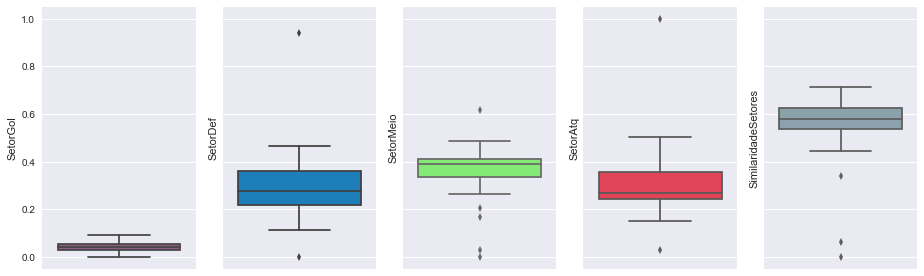

In [68]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(13,4))
sns.boxplot(y = brasileiraoNE["SetorGol"], ax = ax1, color=sns.xkcd_rgb["purplish"])
sns.boxplot(y = brasileiraoNE["SetorDef"], ax=ax2, color=sns.xkcd_rgb["cerulean"])
sns.boxplot(y = brasileiraoNE["SetorMeio"], ax=ax3, color=sns.xkcd_rgb["lighter green"])
sns.boxplot(y = brasileiraoNE["SetorAtq"], ax=ax4, color=sns.xkcd_rgb["strawberry"])
sns.boxplot(y = brasileiraoNE["SimilaridadeSetores"], ax=ax5, color=sns.xkcd_rgb["bluegrey"])
fig.tight_layout()
plt.show()

Em geral, nota-se que os clubes nordestinos investem menos nos goleiros(o que é totalmente aceitável, tendo em vista que apenas 1 goleiro entra em campo). Além disso, percebe-se que os clubes costumam investir de forma bem balanceada entre os 3 setores restantes, com uma leve preferência com o setor de Meio-Campo. Dá para se concluir indiretamente, que os clubes dão muita importância para o setor de ataque, pois o investimento é bem balanceado, mas normalmente os clubes possuem mais defensores e meias, devido à quantidade que entra em campo(os esquemas mais comuns são 4-4-2, 3-5-2 ou 4-3-3)

O próximo passo é treinar uma árvore de decisão para ver se existe um padrão entre os investimentos que dão certo. Com essa árvore pretende-se prever o resultado dos 4 clubes nordestinos que estão disputando o Brasileirão desse ano.

In [69]:
from sklearn import tree
import graphviz

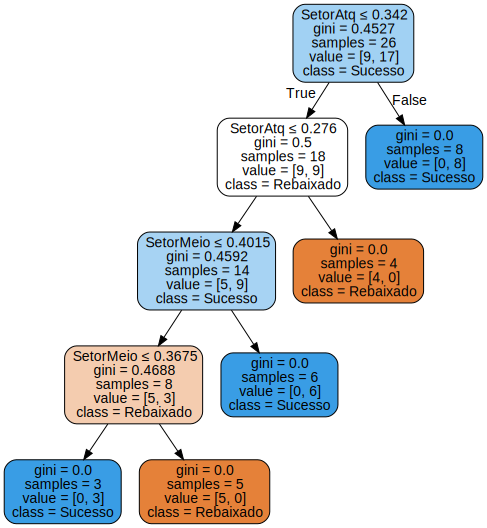

In [92]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

traindata = brasileiraoNE.iloc[:,4:-1]
traintarget = brasileiraoNE["Sucesso"]

clf = clf.fit(traindata, traintarget)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=traindata.T.index,
                                class_names=['Rebaixado', 'Sucesso'],
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Um exemplo de árvore pode ser vista acima. Apesar de separar bem, ela é um pouco inconclusiva, por usar diferentes limiares da mesma feature. Os dois nós que ainda consegue sem expressivos é o que coloca que o investimento no Ataque maior que 34,2% resulta sempre em sucesso(8 dos 26 casos) e o nó que fala do investimento em Meio-Campo ser maior que 40,15% que resulta em sucesso(6 dos 15 casos restantes). Então mesmo as informações da árvore não sendo muito boas, ainda assim podemos ver o quão importante se mostra o investimento em Ataque e Meio 

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfclf = RandomForestClassifier(criterion = 'gini', n_estimators=1000, random_state=0)
rfclf.fit(traindata, traintarget)
importances = rfclf.feature_importances_

In [102]:
features = traindata.T.index
featImportances = []
for i in range(len(features)):
    featImportances.append([features[i], float(format(importances[i], '.4f'))])
featImportances.sort(key=lambda x: x[1], reverse=True)
featImportances

[['IdadeElenco', 0.1063],
 ['SetorAtq', 0.1035],
 ['SetorGol', 0.1018],
 ['SetorMeio', 0.095],
 ['SetorDef', 0.0935],
 ['SimilaridadeSetores', 0.09],
 ['MelhorGol', 0.0884],
 ['MelhorAtq', 0.0852],
 ['MelhorMeio', 0.064],
 ['TamanhoElenco', 0.0629],
 ['MelhorDef', 0.0622],
 ['JogadoresEstrangeiros', 0.0472]]

Ao treinar uma Random Forest conseguimos dar oportunidade a todas as features e então podemos ver quais são as mais significativas. Diferente da árvore unitára gerada anteriormente, aqui não é possível visualizar todo o caminho da decisão, mas é possível tirar boas conclusões também. Antes de afirmar qualquer coisa, é importante saber se a influência dessas features são positivas ou negativas. Separarei os dois Data Frames para ver informações gerais e entender a real influência das features.

In [112]:
sucDF = brasileiraoNE.copy()
failDF = brasileiraoNE.copy()
for i in range(len(brasileiraoNE)):
    if (brasileiraoNE['Sucesso'][i] == 1):
        failDF = failDF.drop(i)
    else:
        sucDF = sucDF.drop(i)

In [113]:
sucDF.describe()

,Pos,Pts,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,SetorGol,SetorDef,SetorMeio,SetorAtq,SimilaridadeSetores,MelhorGol,MelhorDef,MelhorMeio,MelhorAtq,Sucesso
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,12.352941,49.000000,41.470588,24.247059,1.705882,0.034706,0.285588,0.346882,0.332824,0.504471,0.022059,0.127118,0.105176,0.169294,1.0
std,3.200414,4.636809,7.212122,0.877580,1.649421,0.025734,0.198478,0.156462,0.204111,0.198436,0.016146,0.213565,0.068633,0.239980,0.0
min,5.000000,43.000000,29.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,0.031000,1.0
25%,11.000000,46.000000,38.000000,23.500000,0.000000,0.011000,0.205000,0.291000,0.253000,0.471000,0.011000,0.048000,0.075000,0.071000,1.0
50%,12.000000,48.000000,43.000000,24.000000,1.000000,0.038000,0.266000,0.381000,0.271000,0.575000,0.024000,0.070000,0.096000,0.092000,1.0
75%,15.000000,52.000000,45.000000,24.600000,3.000000,0.051000,0.355000,0.417000,0.365000,0.606000,0.037000,0.114000,0.118000,0.142000,1.0
max,16.000000,59.000000,56.000000,25.800000,4.000000,0.090000,0.938000,0.617000,1.000000,0.711000,0.049000,0.938000,0.284000,1.000000,1.0


In [114]:
failDF.describe()

,Pos,Pts,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,SetorGol,SetorDef,SetorMeio,SetorAtq,SimilaridadeSetores,MelhorGol,MelhorDef,MelhorMeio,MelhorAtq,Sucesso
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,18.333333,35.222222,41.111111,24.644444,1.888889,0.048778,0.324889,0.370333,0.256000,0.604556,0.033000,0.096889,0.088667,0.071667,0.0
std,1.224745,6.887993,9.306509,0.853099,1.763834,0.022753,0.086175,0.077886,0.067383,0.055864,0.015223,0.047988,0.031085,0.028085,0.0
min,17.000000,20.000000,29.000000,23.500000,0.000000,0.000000,0.222000,0.168000,0.149000,0.537000,0.000000,0.038000,0.048000,0.040000,0.0
25%,17.000000,31.000000,33.000000,24.100000,1.000000,0.050000,0.274000,0.374000,0.239000,0.556000,0.028000,0.070000,0.063000,0.061000,0.0
50%,18.000000,38.000000,42.000000,24.400000,1.000000,0.052000,0.285000,0.396000,0.262000,0.618000,0.034000,0.077000,0.083000,0.071000,0.0
75%,19.000000,39.000000,45.000000,25.000000,2.000000,0.059000,0.405000,0.400000,0.314000,0.646000,0.039000,0.115000,0.120000,0.076000,0.0
max,20.000000,42.000000,57.000000,26.200000,6.000000,0.078000,0.466000,0.427000,0.332000,0.681000,0.051000,0.180000,0.128000,0.138000,0.0


A partir das informações das importâncias das features e de uma comparação entre médias e quatis, boas informações podem ser retiradas disso:
- É importante ter um elenco mais <b>jovem</b>. Apesar da distância entre as médias não ser tão grande, é importante salientar que o valor da idade é um valor médio, e pequenas variâncias nesse número tem um impacto relativamente maior no elenco inteiro
- Investir no  <b>Ataque</b> é o mais importante!! Apesar das features dos outros setores terem influência parecida, a partir das valores do describe, percebemos que os times que tiveram sucesso tiveram bem menos investimento nos outros 3 setores, a influência alta não fala muita coisa, pois ela pode ter impacto negativo também.
- Investir em um <b>atacante de qualidade</b> dá mais retorno do que o investimento em um jogador de peso de outro setor. Os times que tiveram sucesso tinham um atacante custando em média 17% do valor total do elenco, enquanto os clubes que falharam tinha o seu melhor atacante custando em média apenas 7% do elenco.
- O investimento em jogadores de peso em outros setores não tem muita influência, assim como a quantidade de jogadores estrangeiros no elenco e nem o tamanho do elenco. Os clubes que tiveram sucesso e os que falharam tiveram valores bem similares nessas categorias
- Apesar do indicado ser valorizar o ataque, <b>não se deve ignorar os outros setores</b>. Os times que obtiveram sucesso, apesar de priorizarem o ataque, tinham um bom índice de similaridade entre os setores, com a mediana em 0.57 

## Predição para 2018